# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This Dandiset contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. It supports the findings in Sosa, Plitt, &amp; Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

The study investigates how hippocampal place cell activity spans spatial and non-spatial episodes, and whether hippocampal activity encodes entire sequences of events relative to reward. Two-photon imaging of hippocampal CA1 was performed as mice navigated virtual environments with changing hidden reward locations.

**Dandiset Link:** [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

## Notebook Summary

This notebook will cover the following:
- Listing required packages.
- Loading the Dandiset metadata using the DANDI API.
- Listing some assets within the Dandiset.
- Loading a specific NWB file from the Dandiset.
- Summarizing the contents of the NWB file.
- Visualizing some data from the NWB file, including:
    - Animal's position over time.
    - Lick events.
    - Neural activity (Fluorescence traces).
    - Region of Interest (ROI) masks.
- Summarizing findings and suggesting possible future directions.

## Required Packages

The following Python packages are required to run this notebook. It is assumed that these are already installed on your system.
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `numpy`
- `matplotlib`
- `seaborn`

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling for plots (except images)
sns.set_theme()

## Loading the Dandiset using the DANDI API

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'N/A')}")


# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Dandiset description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is unknown. To test this, we performed two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations. When the reward moved, a subpopulation of neurons updated their firing fields to the same relative position with respect to reward, constructing behavioral timescale sequ

## Loading an NWB File

We will now load one of the NWB files from the Dandiset. The specific file we will load is `sub-m11/sub-m11_ses-03_behavior+ophys.nwb`.

The URL for this asset is obtained using its asset ID (`d77ea78a-8978-461d-9d11-3c5cef860d82`):
`https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/`

In [3]:
# Load the NWB file
# This URL was determined by running: python tools_cli.py nwb-file-info 001361 <NWB_FILE_URL> --version 0.250406.0045
# with <NWB_FILE_URL> = https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/
nwb_file_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(nwb_file_url)
h5_file = h5py.File(remote_file, 'r') # Ensure read-only mode
io = pynwb.NWBHDF5IO(file=h5_file, mode='r') # Ensure read-only mode for pynwb
nwb = io.read()

print(f"Successfully loaded NWB file: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Successfully loaded NWB file: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session description: processed suite2p data
Session start time: 2023-02-23 00:00:00-08:00


### Neurosift Link
You can explore this NWB file interactively on Neurosift:
[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045)

## Summarizing NWB File Contents

The loaded NWB file contains various types of data. Here's a summary:

- **General Information:**
    - `identifier`: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
    - `session_description`: processed suite2p data
    - `session_start_time`: 2023-02-23T00:00:00-08:00
    - `experimenter`: ['Mari Sosa']
    - `subject`:
        - `subject_id`: m11
        - `species`: Mus musculus
        - `sex`: M

- **Acquisition Data (`nwb.acquisition`):**
    - `TwoPhotonSeries`: Raw two-photon imaging data.
        - `dimension`: [512 796] (pixels)
        - `rate`: ~15.5 Hz (imaging rate)
        - `imaging_plane`: Information about the imaging plane (e.g., location: hippocampus, CA1, indicator: GCaMP7f).

- **Processing Data (`nwb.processing`):**
    - `behavior`: Contains behavioral time series data.
        - `BehavioralTimeSeries`:
            - `Reward`: Timing and amount of reward.
            - `autoreward`: Whether trial was automatically rewarded.
            - `environment`: Virtual reality environment details.
            - `lick`: Lick detection data.
            - `position`: Position in the virtual linear track.
            - `reward_zone`: Reward zone entry.
            - `scanning`: Whether ophys data collection occurred.
            - `speed`: Speed of the subject.
            - `teleport`: End of a trial.
            - `trial_number`: Trial number.
            - `trial_start`: Start of a trial.
    - `ophys`: Contains processed optical physiology data.
        - `Backgrounds_0`: Background images (e.g., `Vcorr`, `max_proj`, `meanImg`).
        - `Deconvolved`: Deconvolved fluorescence traces (`RoiResponseSeries` named `plane0`).
            - `data`: Shape (num_frames, num_rois) - e.g., (19818, 349)
            - `rois`: DynamicTableRegion pointing to `PlaneSegmentation` table.
        - `Fluorescence`: Raw fluorescence traces (`RoiResponseSeries` named `plane0`).
            - `data`: Shape (num_frames, num_rois) - e.g., (19818, 349)
            - `rois`: DynamicTableRegion pointing to `PlaneSegmentation` table.
        - `ImageSegmentation`: Contains `PlaneSegmentation` table.
            - `PlaneSegmentation`: Table with ROI information.
                - `colnames`: ['pixel_mask', 'iscell', 'planeIdx']
                - `id`: ROI IDs.
                - `pixel_mask`: Pixel masks for each ROI.
                - `iscell`: Classification of ROIs (cell or not).
        - `Neuropil`: Neuropil fluorescence traces (`RoiResponseSeries` named `plane0`).

## Visualizing Data from the NWB File

### Behavioral Data: Position
Let's plot the animal's position on the virtual linear track over time.
We will load a subset of the data to keep the plot manageable and reduce loading time.

Plotting the first 5000 data points for position.


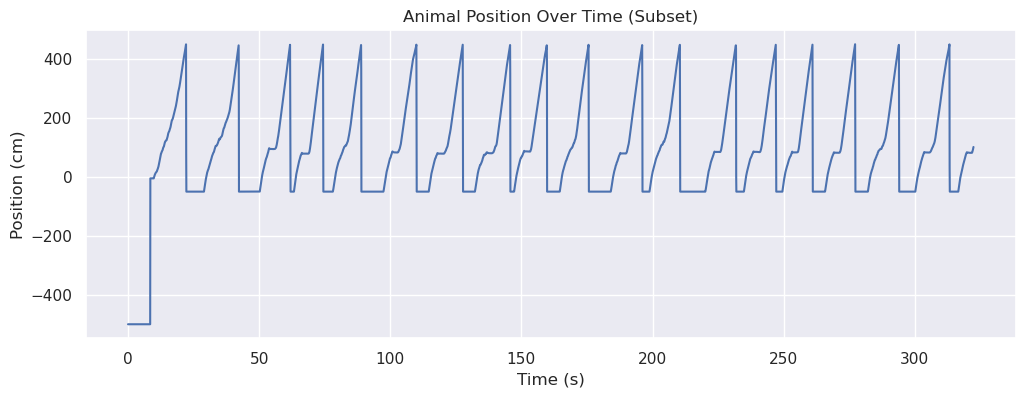

In [4]:
position_ts = nwb.processing['behavior']['BehavioralTimeSeries']['position']
timestamps = position_ts.timestamps[:]
data = position_ts.data[:]

# Select a subset of data for plotting (e.g., first 5000 points)
num_points_to_plot = 5000
if len(timestamps) > num_points_to_plot:
    timestamps_subset = timestamps[:num_points_to_plot]
    data_subset = data[:num_points_to_plot]
    print(f"Plotting the first {num_points_to_plot} data points for position.")
else:
    timestamps_subset = timestamps
    data_subset = data
    print("Plotting all available data points for position.")


plt.figure(figsize=(12, 4))
plt.plot(timestamps_subset, data_subset)
plt.xlabel('Time (s)')
plt.ylabel(f'Position ({position_ts.unit})')
plt.title('Animal Position Over Time (Subset)')
plt.grid(True)
plt.show()

### Behavioral Data: Lick Events
Now, let's visualize lick events. Since lick data is cumulative per imaging frame, we can plot its raw values.
Again, we will plot a subset.

Plotting the first 5000 data points for licks.


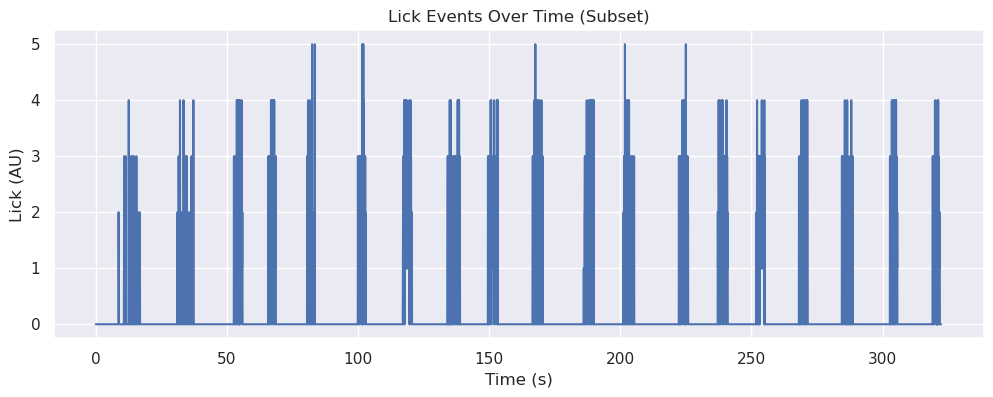

In [5]:
lick_ts = nwb.processing['behavior']['BehavioralTimeSeries']['lick']
lick_timestamps = lick_ts.timestamps[:]
lick_data = lick_ts.data[:]

# Select a subset of data for plotting
if len(lick_timestamps) > num_points_to_plot:
    lick_timestamps_subset = lick_timestamps[:num_points_to_plot]
    lick_data_subset = lick_data[:num_points_to_plot]
    print(f"Plotting the first {num_points_to_plot} data points for licks.")
else:
    lick_timestamps_subset = lick_timestamps
    lick_data_subset = lick_data
    print("Plotting all available data points for licks.")

plt.figure(figsize=(12, 4))
plt.plot(lick_timestamps_subset, lick_data_subset)
plt.xlabel('Time (s)')
plt.ylabel(f'Lick ({lick_ts.unit})')
plt.title('Lick Events Over Time (Subset)')
plt.grid(True)
plt.show()

### Optical Physiology Data: Fluorescence Traces

We can visualize the fluorescence traces for a few selected ROIs (Regions of Interest).
We will use the `Fluorescence/plane0` dataset. The `rois` attribute of this dataset links to the `PlaneSegmentation` table which contains ROI IDs.

Number of ROIs: 349
Plotting fluorescence traces for ROI IDs: [0 1 2]
Plotting the first 1000 time frames for fluorescence.


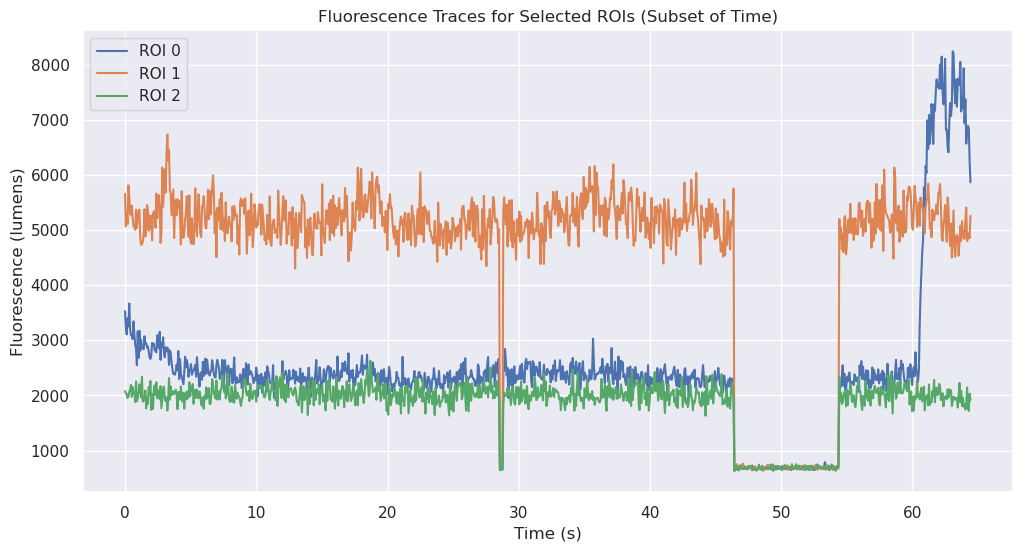

In [6]:
fluorescence_rrs = nwb.processing['ophys']['Fluorescence']['plane0']
fluorescence_data = fluorescence_rrs.data
fluorescence_timestamps = np.arange(fluorescence_data.shape[0]) / fluorescence_rrs.rate # Calculate timestamps

# The ROI IDs can be accessed from the PlaneSegmentation table
plane_segmentation = nwb.processing['ophys']['ImageSegmentation']['PlaneSegmentation']
roi_ids = plane_segmentation.id[:]

# Select a few ROIs to plot (e.g., first 3 ROIs)
num_rois_to_plot = 3
selected_roi_indices = list(range(min(num_rois_to_plot, len(roi_ids))))
selected_roi_ids = roi_ids[selected_roi_indices]

print(f"Number of ROIs: {len(roi_ids)}")
print(f"Plotting fluorescence traces for ROI IDs: {selected_roi_ids}")

# Select a subset of time for plotting (e.g., first 1000 frames)
num_frames_to_plot = 1000
if fluorescence_data.shape[0] > num_frames_to_plot:
    fluorescence_data_subset = fluorescence_data[:num_frames_to_plot, selected_roi_indices]
    fluorescence_timestamps_subset = fluorescence_timestamps[:num_frames_to_plot]
    print(f"Plotting the first {num_frames_to_plot} time frames for fluorescence.")
else:
    fluorescence_data_subset = fluorescence_data[:, selected_roi_indices]
    fluorescence_timestamps_subset = fluorescence_timestamps
    print("Plotting all available time frames for fluorescence.")


plt.figure(figsize=(12, 6))
for i, roi_idx in enumerate(selected_roi_indices):
    plt.plot(fluorescence_timestamps_subset, fluorescence_data_subset[:, i], label=f'ROI {selected_roi_ids[i]}')

plt.xlabel('Time (s)')
plt.ylabel(f'Fluorescence ({fluorescence_rrs.unit})')
plt.title(f'Fluorescence Traces for Selected ROIs (Subset of Time)')
plt.legend()
plt.grid(True)
plt.show()

### Optical Physiology Data: ROI Masks

We can visualize the spatial layout of the ROIs. Each ROI has a `pixel_mask`.
The `pixel_mask` for each ROI is a list of (x, y, weight) tuples.
We can create an image showing all ROI masks superimposed.

The dimensions of the imaging plane can be found in `nwb.acquisition['TwoPhotonSeries'].dimension[:]`.

Imaging plane dimensions (height, width): [512 796]
Visualizing masks for the first 50 ROIs.


/tmp/ipykernel_1440/3464454681.py:27: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring this parameter.
  plt.style.use(current_style) # Revert to previous style
/tmp/ipykernel_1440/3464454681.py:27: UserWarning: Style includes a parameter, 'backend_fallback', that is not related to style.  Ignoring this parameter.
  plt.style.use(current_style) # Revert to previous style
/tmp/ipykernel_1440/3464454681.py:27: UserWarning: Style includes a parameter, 'date.epoch', that is not related to style.  Ignoring this parameter.
  plt.style.use(current_style) # Revert to previous style
/tmp/ipykernel_1440/3464454681.py:27: UserWarning: Style includes a parameter, 'docstring.hardcopy', that is not related to style.  Ignoring this parameter.
  plt.style.use(current_style) # Revert to previous style
/tmp/ipykernel_1440/3464454681.py:27: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.

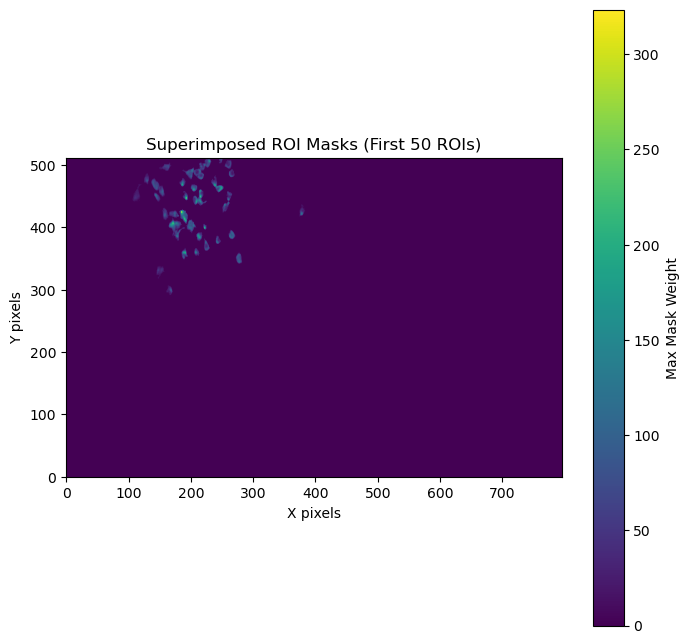

In [7]:
img_dims = nwb.acquisition['TwoPhotonSeries'].dimension[:]
print(f"Imaging plane dimensions (height, width): {img_dims}")

# Create an empty image to store the superimposed masks
roi_map_image = np.zeros((img_dims[0], img_dims[1]))

# Iterate through the first few ROIs and add their masks to the image
num_rois_for_map = min(50, len(plane_segmentation)) # Visualize up to 50 ROIs to keep it less cluttered
print(f"Visualizing masks for the first {num_rois_for_map} ROIs.")

for i in range(num_rois_for_map):
    pixel_mask = plane_segmentation['pixel_mask'][i]
    for x, y, weight in pixel_mask:
        if 0 <= int(x) < roi_map_image.shape[1] and 0 <= int(y) < roi_map_image.shape[0]: # Check bounds
            roi_map_image[int(y), int(x)] = max(roi_map_image[int(y), int(x)], weight) # Use max to show overlap

# Display the ROI map
plt.figure(figsize=(8, 8))
# Do not use seaborn theme for images
current_style = plt.rcParams.copy()
plt.style.use('default') # Temporarily switch to default for image plotting
plt.imshow(roi_map_image, cmap='viridis', origin='lower')
plt.colorbar(label='Max Mask Weight')
plt.title(f'Superimposed ROI Masks (First {num_rois_for_map} ROIs)')
plt.xlabel('X pixels')
plt.ylabel('Y pixels')
plt.style.use(current_style) # Revert to previous style
plt.show()

### Advanced Visualization: Animal's Speed vs. Position

Let's create a scatter plot showing the animal's speed at different positions along the track.
This can help identify if the animal runs faster or slower in certain parts of the environment.
We will use the same subset of data as used for the individual position and speed plots for consistency.

Using the first 5000 data points for speed (consistent with position plot).


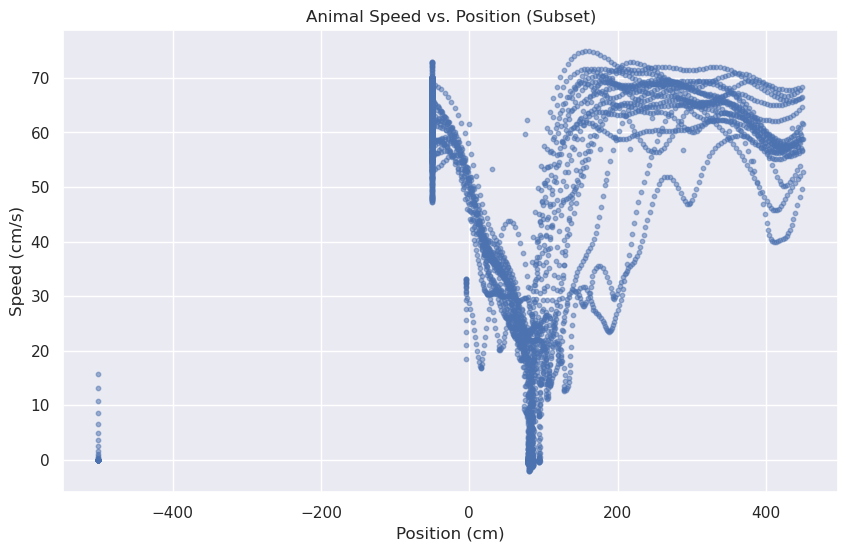

In [8]:
speed_ts = nwb.processing['behavior']['BehavioralTimeSeries']['speed']
speed_data = speed_ts.data[:]
# Use the same timestamps and subset length as the position plot
# Position data (data_subset) and timestamps (timestamps_subset) are already defined

if len(speed_data) > num_points_to_plot:
    speed_data_subset = speed_data[:num_points_to_plot]
    print(f"Using the first {num_points_to_plot} data points for speed (consistent with position plot).")
else:
    # This case should ideally not happen if position and speed have same length and we subsetted position
    speed_data_subset = speed_data
    print(f"Using all {len(speed_data)} available data points for speed.")

plt.figure(figsize=(10, 6))
# Ensure data_subset (position) and speed_data_subset have the same length for plotting
min_len = min(len(data_subset), len(speed_data_subset))
plt.scatter(data_subset[:min_len], speed_data_subset[:min_len], alpha=0.5, s=10) # s is marker size
plt.xlabel(f'Position ({position_ts.unit})')
plt.ylabel(f'Speed ({speed_ts.unit})')
plt.title('Animal Speed vs. Position (Subset)')
plt.grid(True)
plt.show()

## Summary of Findings and Future Directions

This notebook demonstrated how to:
- Access and understand the metadata of Dandiset 001361.
- Load a specific NWB file from this Dandiset.
- Explore the structure of the NWB file, identifying key data groups like behavioral time series and optical physiology data.
- Visualize various data types:
    - Animal's movement (position, speed).
    - Behavioral events (licks).
    - Neural activity (fluorescence traces from selected ROIs).
    - Spatial layout of ROIs.
- Create a combined visualization (speed vs. position).

**Key Observations from this NWB file (sub-m11/sub-m11_ses-03_behavior+ophys.nwb):**
- The mouse navigates a linear track, as seen in the position plot.
- Lick events are recorded, likely corresponding to reward consumption or anticipation.
- Fluorescence traces show neural activity from numerous cells in CA1, with varying activity patterns.
- ROI masks provide the spatial footprints of these recorded neurons.

**Possible Future Directions:**
- **Correlate Neural Activity with Behavior:** Analyze how neural firing patterns (e.g., from `Deconvolved` traces) relate to specific behaviors like running speed, position on the track, or reward anticipation.
- **Place Cell Analysis:** Identify place cells by correlating neural activity with the animal's position. Visualize place fields.
- **Sequence Analysis:** Investigate if sequences of neural activation correspond to trajectories through the virtual environment or around reward zones, as suggested by the Dandiset's description.
- **Learning-Related Changes:** Compare neural representations across different sessions or learning stages (if data from multiple sessions/stages for the same animal is available and analyzed).
- **Population Coding:** Explore how populations of neurons collectively encode information about the environment, position, or task variables.
- **Effect of Reward Relocation:** If analyzing files related to reward relocation experiments, investigate how neural codes adapt to changes in reward contingency.
- **Explore Other NWB Files:** This Dandiset contains many NWB files. Repeating this analysis or more advanced analyses on other files could reveal subject-to-subject variability or consistent patterns.

This notebook provides a starting point for exploring the rich dataset within Dandiset 001361. Researchers can adapt and extend the provided code to delve deeper into specific scientific questions.

---
End of AI-Generated Notebook
---

In [9]:
# Close the HDF5 file and remfile
if 'io' in locals() and io is not None:
    io.close()
if 'h5_file' in locals() and h5_file is not None:
    try:
        h5_file.close()
    except Exception as e:
        print(f"Error closing h5_file: {e}")
if 'remote_file' in locals() and remote_file is not None:
    try:
        remote_file.close()
    except Exception as e:
        print(f"Error closing remote_file: {e}")

print("Notebook execution finished. Resources closed.")

Notebook execution finished. Resources closed.
